In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
data=pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')

/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv


# **Exploring Data**

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [3]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [4]:
data.head(7)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia


In dataframe we have 3 nominal(Gender, Occupation, BMI Category),  2 ordinal (Quality of Sleep, Stress Level, but we can interpret as numerical) and 6 numerical features. Except Id and Sleep Disorder.

Replacing NaN, by None which means no Sleep Disorder.

**Target value:**

In [5]:
data['Sleep Disorder'].fillna('None', inplace=True)
print(data['Sleep Disorder'].value_counts())
px.pie(data, names='Sleep Disorder', title='Percentage of each class')

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


As we can see, we have a multiclassification task with 3 classes (None, Sleep Apnea, Insomnia). 
40% of entries have Sleep Disorder.

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Occupation'>

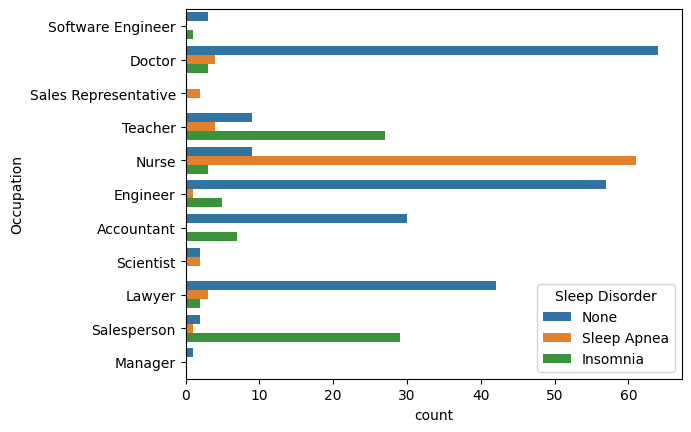

In [6]:
print(data['Occupation'].value_counts())
sns.countplot(data=data,y=data['Occupation'],hue='Sleep Disorder')

For deep understanding we take a look about features of each occupation.

<Axes: xlabel='Age', ylabel='Occupation'>

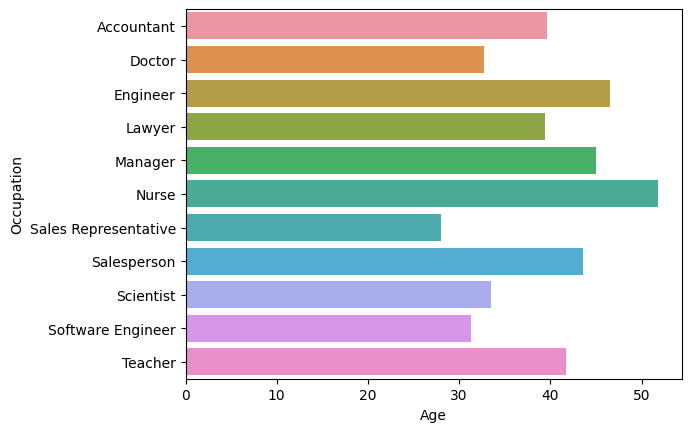

In [7]:
average_age_by_occupation = data.groupby('Occupation')['Age'].mean().reset_index()
sns.barplot(x='Age', y='Occupation', data=average_age_by_occupation)


<Axes: xlabel='Sleep Duration', ylabel='Occupation'>

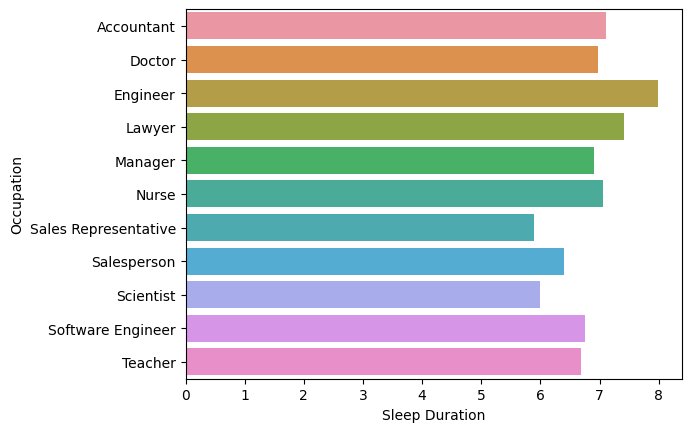

In [8]:
average_sleep_by_occupation = data.groupby('Occupation')['Sleep Duration'].mean().reset_index()
sns.barplot(x='Sleep Duration', y='Occupation', data=average_sleep_by_occupation)

We observe that nurses in our dataset mostly have Sleep Apnea, maybe because nurses here are mostly older than 50 years.
Teachers usually have insomnia, possibly due to stress or a lack of sleep duration. Salespersons mostly have insomnia and exhibit the same situation and statistics as teachers. Others don't have problems with sleep or have only a few samples in the dataset.

Gender
Male      189
Female    185
Name: count, dtype: int64
Gender          Female  Male
Sleep Disorder              
Insomnia            36    41
None                82   137
Sleep Apnea         67    11


<Axes: xlabel='Gender', ylabel='count'>

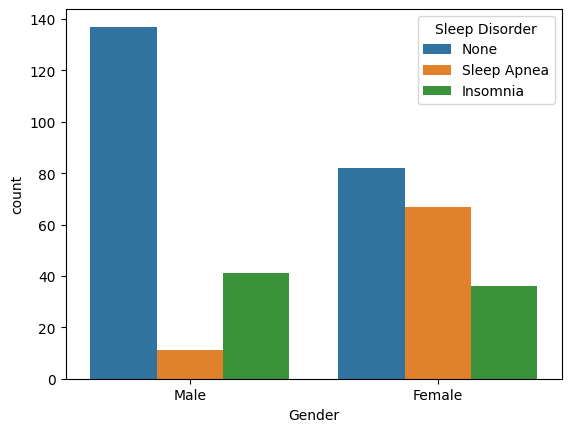

In [9]:
print(data['Gender'].value_counts())          
print(pd.crosstab(index=data['Sleep Disorder'], columns=data['Gender']))
sns.countplot(data=data,x=data['Gender'],hue='Sleep Disorder')

As we can see females much more often suffer from sleep disorder. 55% of females have Sleep Disorder, while only 27% of males have Sleep Disorder.

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='BMI Category'>

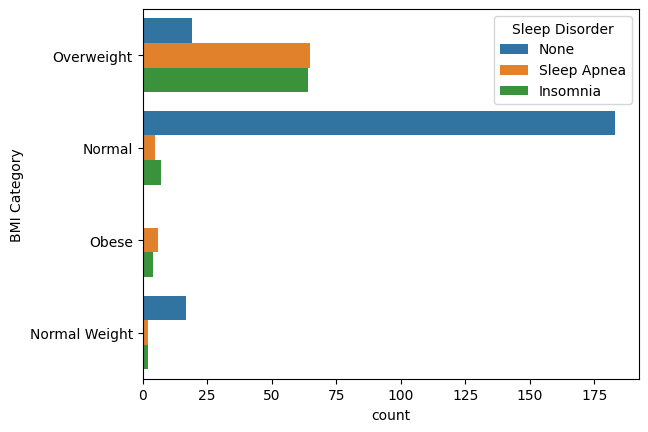

In [10]:
print(data['BMI Category'].value_counts())
sns.countplot(data=data,y=data['BMI Category'],hue='Sleep Disorder')

Here we can clearly see that overweight and obvious are reasons for Sleep Disorder.

<Axes: xlabel='Stress Level', ylabel='count'>

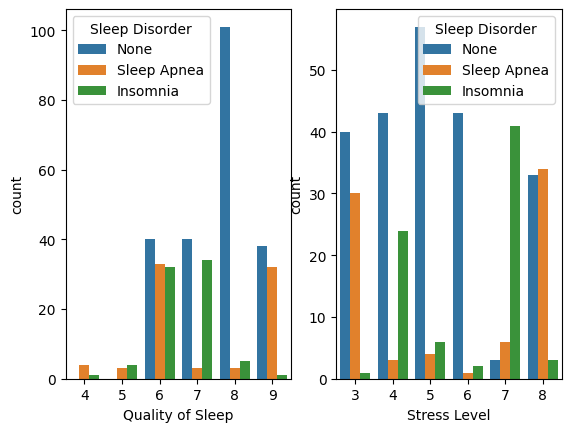

In [11]:
fig,axs=plt.subplots(1,2)
sns.countplot(data=data,x=data['Quality of Sleep'],ax=axs[0],hue='Sleep Disorder')
sns.countplot(data=data,x=data['Stress Level'],ax=axs[1],hue='Sleep Disorder')


We can see that those with less than 8 points of Quality of sleep often have Insomnia, except for Sleep Apnea, which ranges from 4 to 9 points, excluding 7 and 8. 
Stress levels dont have clear dependence.

<Axes: xlabel='Physical Activity Level', ylabel='Count'>

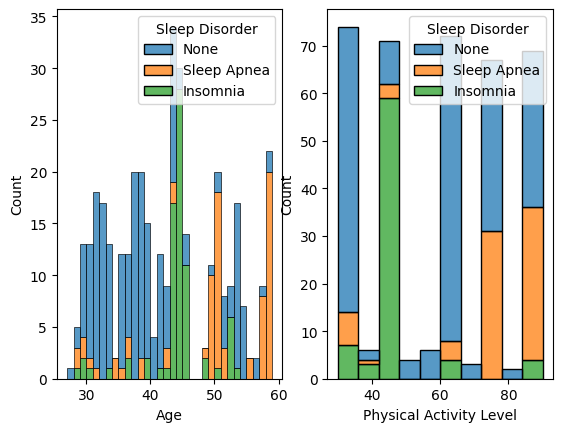

In [12]:
fig,axs=plt.subplots(1,2)
sns.histplot(data=data,x='Age',bins=32,ax=axs[0], hue='Sleep Disorder', multiple="stack")
sns.histplot(data=data,x='Physical Activity Level',ax=axs[1], hue='Sleep Disorder', multiple="stack")


Regarding age, most people from 40 to 50 have insomnia, while those over 50 tend to have sleep apnea.

<Axes: xlabel='Daily Steps', ylabel='Count'>

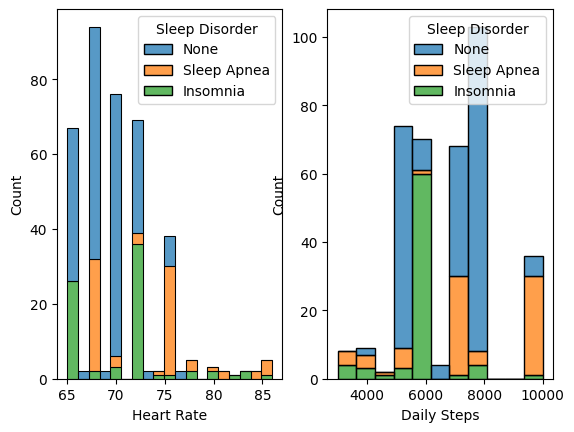

In [13]:
fig,axs=plt.subplots(1,2)
sns.histplot(data=data,x='Heart Rate',ax=axs[0], hue='Sleep Disorder', multiple="stack")
sns.histplot(data=data,x='Daily Steps',ax=axs[1], hue='Sleep Disorder', multiple="stack")

<Axes: xlabel='Sleep Duration', ylabel='Count'>

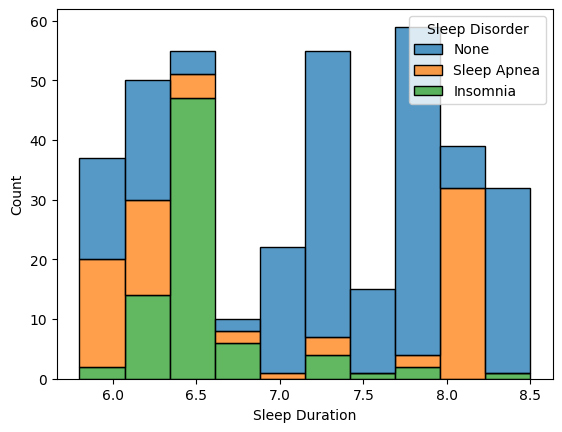

In [14]:
# sns.histplot(data=data,x='Sleep Duration',hue='Sleep Disorder')
sns.histplot(data,x='Sleep Duration',hue='Sleep Disorder', multiple="stack")

For Sleep Duration, less than 7 hours is associated with insomnia, while for apnea, it's not clear

In [15]:
data['Blood Pressure'][:7]

0    126/83
1    125/80
2    125/80
3    140/90
4    140/90
5    140/90
6    140/90
Name: Blood Pressure, dtype: object

As we can see Blood Pressure is features contained 2 parameters, so we going to split into 2 features like Blood_Pressure1 and Blood_Pressure2

In [16]:
data[['Blood_Pressure1', 'Blood_Pressure2']] = data['Blood Pressure'].str.split('/', expand=True)
data.drop(columns=['Blood Pressure'], inplace=True)

<Axes: xlabel='Blood_Pressure2', ylabel='Count'>

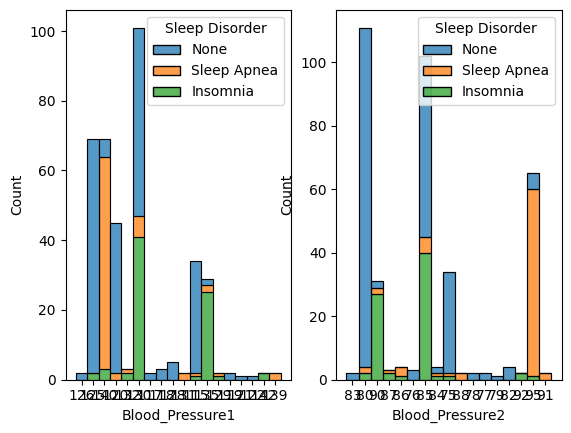

In [17]:
fig,axs=plt.subplots(1,2)
sns.histplot(data=data,x='Blood_Pressure1',ax=axs[0], hue='Sleep Disorder', multiple="stack")
sns.histplot(data=data,x='Blood_Pressure2',ax=axs[1], hue='Sleep Disorder', multiple="stack")

<Axes: xlabel='Age', ylabel='Sleep Duration'>

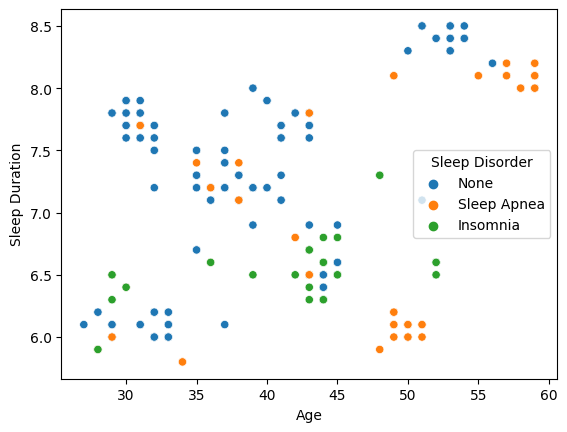

In [18]:
sns.scatterplot(data=data,x='Age',y='Sleep Duration', hue='Sleep Disorder')

<Axes: xlabel='Age', ylabel='Count'>

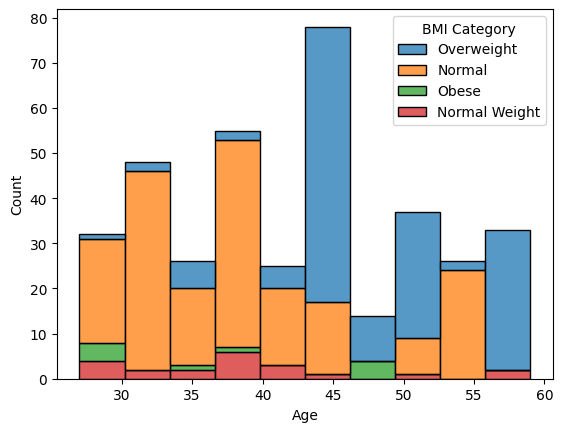

In [19]:
sns.histplot(data,x='Age',hue='BMI Category', multiple="stack")     

 Overweight increases from age 45.

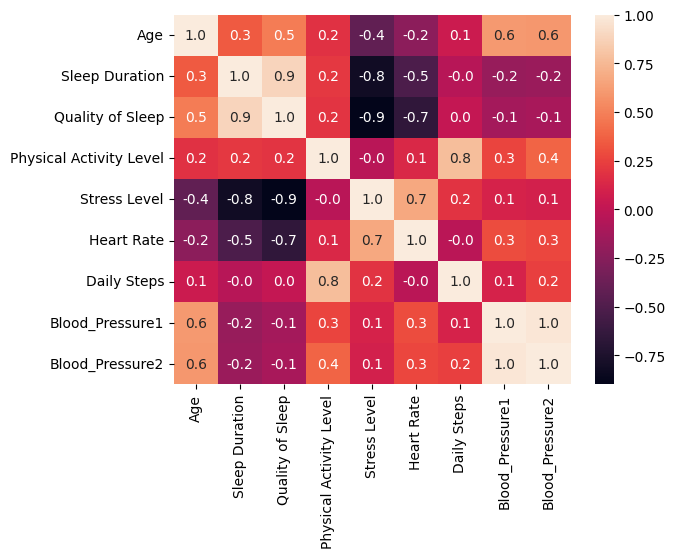

In [20]:
sns.heatmap(data[['Age','Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level','Heart Rate',"Daily Steps",'Blood_Pressure1','Blood_Pressure2']].corr(),annot=True,fmt="1.1f");

Age has a clear corelation with Quality of sleep, Stress level(negative corr) and Blood presure. Sleep duration corelate with Quality of sleep, Stress level(negative corr), Heart rate and Sleep Duration. Phisical Activity also obviously correlate with daily steps.

# Summary:
* Multiclassification task with 3 classes (None, Sleep Apnea, Insomnia). 
* 40% of entries have Sleep Disorder.
* Nurses in our dataset mostly have Sleep Apnea, Teachers usually have insomnia, Salespersons mostly have insomnia. Others don't have problems with sleep or have only a few samples in the dataset.
* 55% of females have Sleep Disorder, while 27% of males have Sleep Disorder.
* Overweight and obesity are reasons of Sleep Disorder.
* For age, most people from 40 to 50 have insomnia, while over 50 tend to have sleep apnea.
* Samples with less than 8 points of Quality of sleep often have Insomnia, except for Sleep Apnea, which ranges from 4 to 9 points, excluding 7 and 8.  
* For Sleep Duration, less than 7 hours is associated with insomnia, while for apnea, it's not clear. 
* Overweight increases from age 45.

# Feature engineering

In [21]:
data.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood_Pressure1,Blood_Pressure2
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80


In [22]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


**Plan:**
* OHE: Gender, Occupation, BMI Category.
* Age to Age_group (I'm going to split it on 4 groups, 8 years each)


In [23]:
ohe=pd.get_dummies(data[['Gender', 'Occupation', 'BMI Category']]).astype(int)
for i in range(5):
    data.loc[(data.Age >= 27+(i*8)) & (data.Age < 27+(i*8)+8), 'AgeGroup'] = i
data.drop(columns=['Gender', 'Occupation', 'BMI Category', 'Age'], inplace=True)
data=pd.concat([data, ohe], axis = 1)





In [24]:
data.isna().sum()

Person ID                          0
Sleep Duration                     0
Quality of Sleep                   0
Physical Activity Level            0
Stress Level                       0
Heart Rate                         0
Daily Steps                        0
Sleep Disorder                     0
Blood_Pressure1                    0
Blood_Pressure2                    0
AgeGroup                           0
Gender_Female                      0
Gender_Male                        0
Occupation_Accountant              0
Occupation_Doctor                  0
Occupation_Engineer                0
Occupation_Lawyer                  0
Occupation_Manager                 0
Occupation_Nurse                   0
Occupation_Sales Representative    0
Occupation_Salesperson             0
Occupation_Scientist               0
Occupation_Software Engineer       0
Occupation_Teacher                 0
BMI Category_Normal                0
BMI Category_Normal Weight         0
BMI Category_Obese                 0
B

In [25]:
X=data.drop(columns=['Sleep Disorder','Person ID'])
Y=data[['Sleep Disorder']]
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2,random_state=13)

**I'm goint to use KNeighborsClassifier, SVC, DecisionTreeClassifier, RandomForestClassifier.**

**DummyClassifier**

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def eval_model(y_true,y_predicted):
    cm = confusion_matrix(y_true, y_predicted)  #Confusion Matrix
    cm_display=ConfusionMatrixDisplay(confusion_matrix = cm)
    cm_display.plot()

    print('accuracy score',accuracy_score(y_true, y_predicted))

In [27]:
print('accuracy_score for DummyClassifier(baseline)',accuracy_score(y_val,(DummyClassifier().fit(X_train, y_train).predict(X_val))))

accuracy_score for DummyClassifier(baseline) 0.5866666666666667


**Support Vector Classification**

GridSearch for parameters tuning:

In [28]:
# params = {
#     'C': [0.1, 1, 2, 5, 7],
#     'gamma': [0.0001,0.005, 0.001, 0.01]
# }
# svc = SVC()
# grid = GridSearchCV(svc, params, cv = 3)
# grid.fit(X_train, y_train)
# print(grid.best_score_)
# print(grid.best_params_)

Training and evaluating on test

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



accuracy score 0.9333333333333333


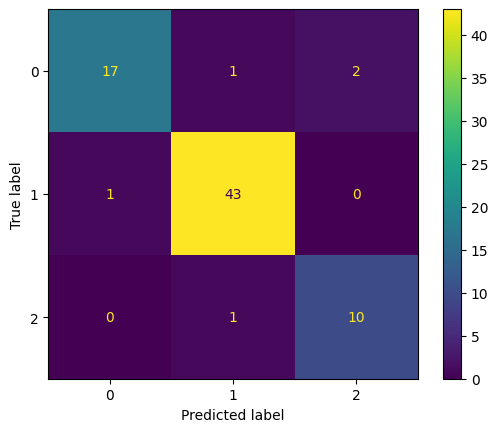

In [29]:
svc = SVC(C=2, gamma=0.005)
svc.fit(X_train, y_train)
y_predicted=svc.predict(X_val)
eval_model(y_val,y_predicted)

**KNN Classifier**

GridSearch for parameters tuning:

In [30]:
# params = {'n_neighbors': [2,4,5,6,7],
# 'p': [1,2]}
# knn=KNeighborsClassifier()
# grid = GridSearchCV(knn, params, cv = 3)
# grid.fit(X_train, y_train)
# print(grid.best_score_)
# print(grid.best_params_)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



accuracy score 0.8933333333333333


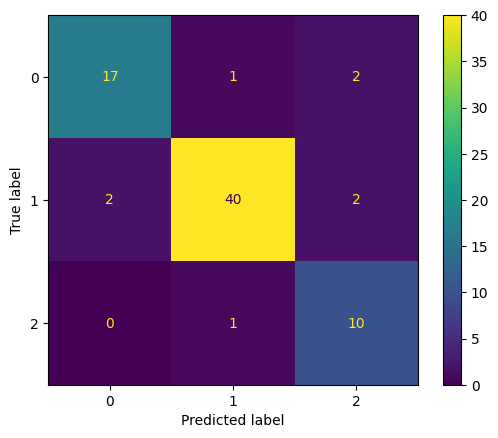

In [31]:
knn = KNeighborsClassifier(n_neighbors=5, p=1)
knn.fit(X_train, y_train)
y_predicted=knn.predict(X_val)
eval_model(y_val,y_predicted)

**Decision Tree Classifier**

GridSearch for parameters tuning:

In [32]:
# params = {'max_depth': [3, 5, 7, 9],
#         'min_samples_split': [2, 3, 4, 6],
#         'criterion': ['entropy', 'gini', 'log_loss']}
# DT = DecisionTreeClassifier()
# grid = GridSearchCV(DT, params, cv = 3)
# grid.fit(X_train, y_train)
# print(grid.best_score_)
# print(grid.best_params_)

accuracy score 0.9333333333333333


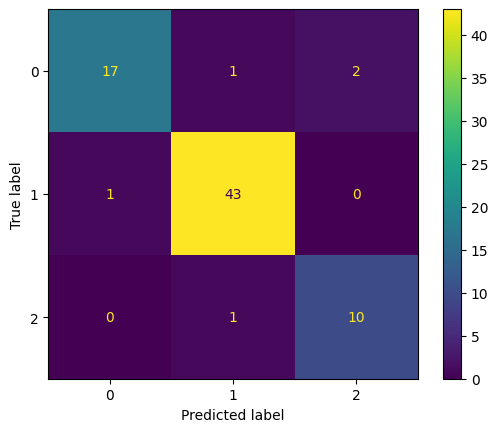

In [33]:
DT = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=3)
DT.fit(X_train, y_train)
y_predicted=DT.predict(X_val)
eval_model(y_val,y_predicted)

**Random Forest Classifier**

GridSearch for parameters tuning:

In [34]:
# params = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
#               'min_samples_split': [2, 3, 4, 5, 6, 7],
#               'criterion': ['entropy', 'gini', 'log_loss']
#              }

# RF = RandomForestClassifier()
# grid = GridSearchCV(RF, params, cv = 3)
# grid.fit(X_train, y_train)
# print(grid.best_score_)
# print(grid.best_params_)

/tmp/ipykernel_20/3615703761.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



accuracy score 0.92


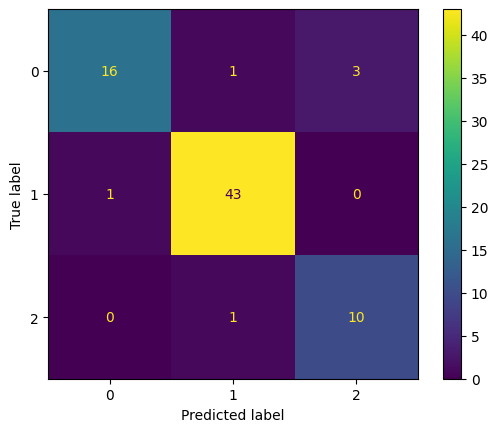

In [35]:
RF = RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=6)
RF.fit(X_train, y_train)
y_predicted=RF.predict(X_val)
eval_model(y_val,y_predicted)